# tf 图片处理

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [60]:
np.set_printoptions(threshold=np.inf)

def show_image_tf(image_tf):
    image = image_tf.eval()
    print("图片大小:{}".format(image.shape))
    if len(image.shape) == 3 and image.shape[2] ==1:
        plt.imshow(image[:,:,0],cmap="Greys_r")
        plt.show()
    elif len(image.shape) == 3:
        plt.imshow(image)
        plt.show()

sess = tf.InteractiveSession()
image_path = 'IMG_data/xiaoren.png'
#image_path = 'IMG_data/black_white.jpg'

/Users/yj/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


图片大小:(600, 510, 3)


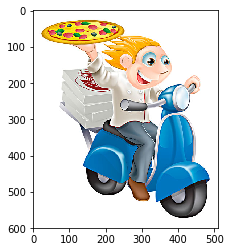

In [61]:
file_contents = tf.read_file(image_path)
image_tf = tf.image.decode_jpeg(contents=file_contents,channels=3)
show_image_tf(image_tf)


图片大小:(200, 200, 3)


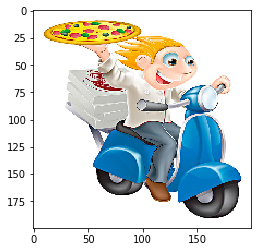

In [23]:
# 大小重置
resize_image_tf = tf.image.resize_images(image_tf,(200,200),method=1)
show_image_tf(resize_image_tf)

图片大小:(300, 300, 3)


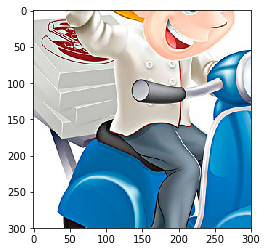

In [33]:
# 剪切&填充
crop_or_pad_image_tf = tf.image.resize_image_with_crop_or_pad(image_tf,300,300)
show_image_tf(crop_or_pad_image_tf)

图片大小:(180, 154, 3)


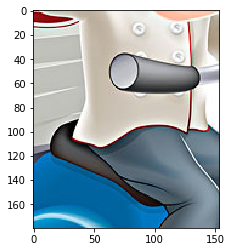

In [39]:
# 中间等比例剪切
central_crop_image_tensor = tf.image.central_crop(image_tf, central_fraction=0.3)
show_image_tf(central_crop_image_tensor)

图片大小:(510, 600, 3)


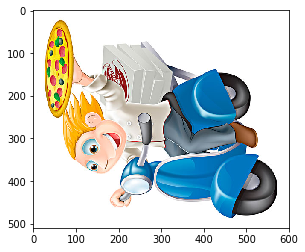

In [45]:
file_transpose_image = tf.image.transpose_image(image_tf)
show_image_tf(file_transpose_image)

图片大小:(600, 510, 3)


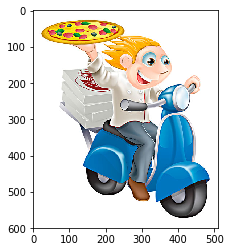

图片大小:(600, 510, 3)


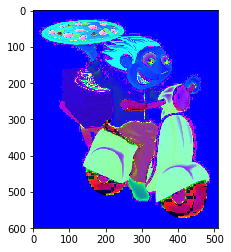

In [46]:
#  五、颜色空间的转换（rgb、hsv、gray）
# 颜色空间的转换必须讲image的值转换为float32类型，不能使用unit8类型
float32_image_tensor = tf.image.convert_image_dtype(image_tf, dtype=tf.float32)
show_image_tf(float32_image_tensor)

# rgb -> hsv（h: 图像的色彩/色度，s:图像的饱和度，v：图像的亮度）
hsv_image_tensor = tf.image.rgb_to_hsv(float32_image_tensor)
show_image_tf(hsv_image_tensor)

图片大小:(600, 510, 3)


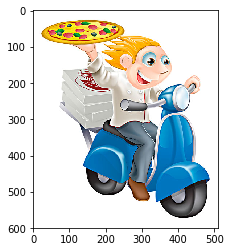

In [51]:
# hsv -> rgb
rgb_image_tensor = tf.image.hsv_to_rgb(hsv_image_tensor)
show_image_tf(rgb_image_tensor)

# rgb -> gray
gray_image_tensor = tf.image.rgb_to_grayscale(float32_image_tensor)


In [53]:
# 可以从颜色空间中提取图像的轮廓信息(图像的二值化)
a = gray_image_tensor
b = tf.less_equal(a, 0.9)
# 0是黑，1是白
# condition?true:false
# condition、x、y格式必须一模一样，当condition中的值为true的之后，返回x对应位置的值，否则返回y对应位置的值
# 对于a中所有大于0.9的像素值，设置为0
c = tf.where(condition=b, x=a, y=a - a)
# 对于a中所有小于等于0.9的像素值，设置为1
d = tf.where(condition=b, x=c - c + 1, y=c)
#show_image_tf(d)

In [54]:
# 图像的归一化(x-mean)/adjusted_sttdev, adjusted_sttdev=max(stddev, 1.0/sqrt(image.NumElements()))
per_image_standardization_image_tensor = tf.image.per_image_standardization(image_tf)
show_image_tf(per_image_standardization_image_tensor)

图片大小:(600, 510, 3)


ValueError: Floating point image RGB values must be in the 0..1 range.

图片大小:(600, 510, 3)


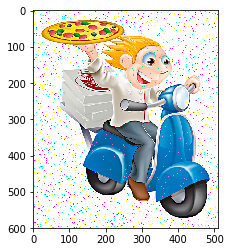

In [56]:
# 七、噪音数据的加入
noisy_image_tensor = image_tf + tf.cast(5 * tf.random_normal(shape=[600, 510, 3], mean=0, stddev=0.1), tf.uint8)
show_image_tf(noisy_image_tensor)